<a href="https://colab.research.google.com/github/wberritt/Projects/blob/main/Audi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df1=pd.read_csv('audi.csv')
df1.head()

FileNotFoundError: ignored

In [ ]:
df1.shape

(10668, 9)

In [ ]:
df1.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
df1.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df1.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


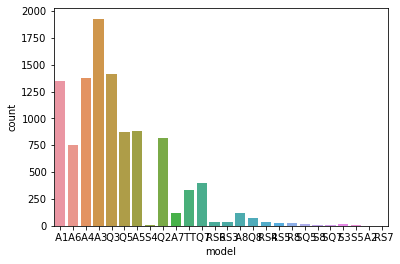

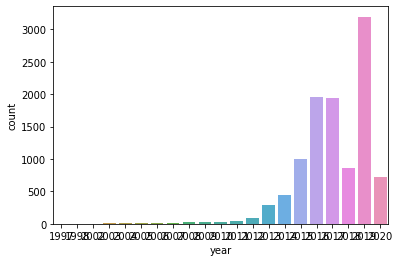

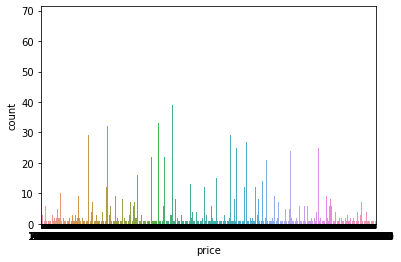

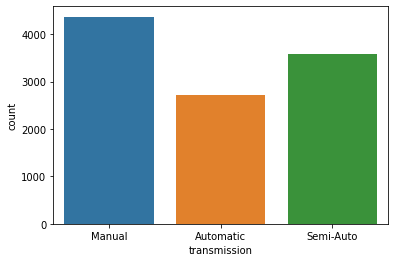

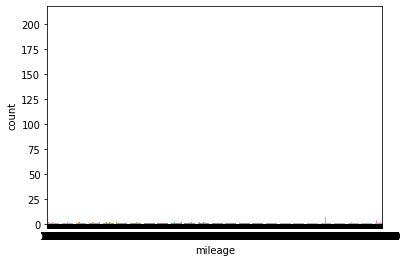

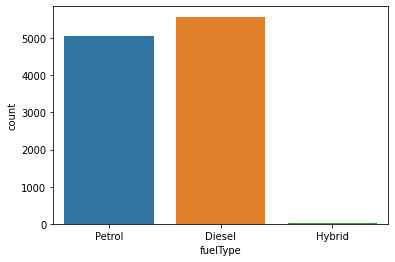

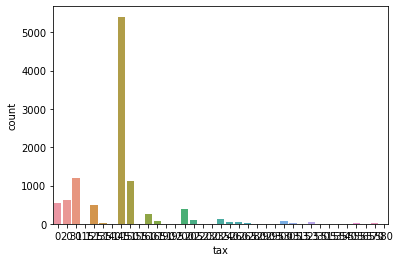

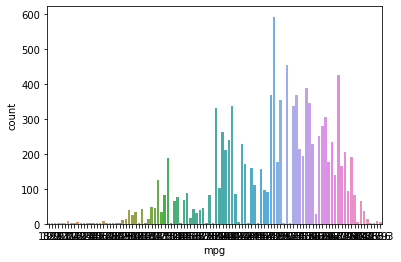

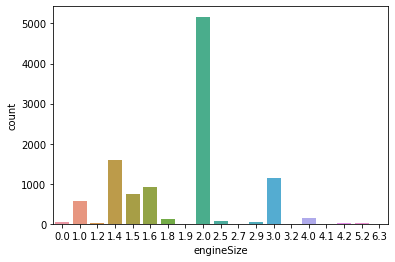

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = df1.select_dtypes([np.int, np.float, np.object])
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

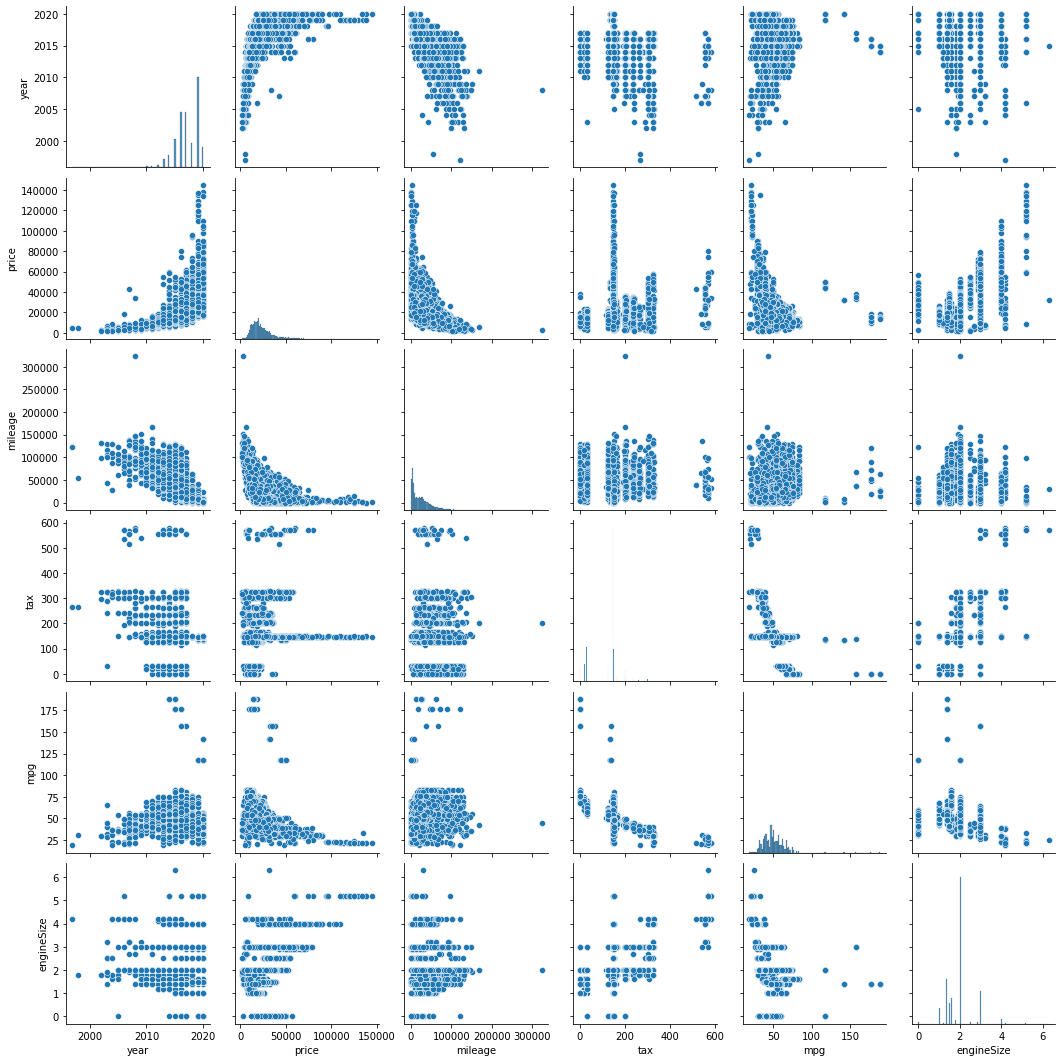

In [ ]:
sns.pairplot(df1)

In [ ]:
df1['Age_of_Car']=2020-df1["year"]
df1=df1.drop(["year"], axis=1)

In [ ]:
df1.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age_of_Car
0,A1,12500,Manual,15735,Petrol,150,55.4,1.4,3
1,A6,16500,Automatic,36203,Diesel,20,64.2,2.0,4
2,A1,11000,Manual,29946,Petrol,30,55.4,1.4,4
3,A4,16800,Automatic,25952,Diesel,145,67.3,2.0,3
4,A3,17300,Manual,1998,Petrol,145,49.6,1.0,1


In [ ]:
import pandas as pd
from scipy import stats
df1['z_score_AoC']=stats.zscore(df1['Age_of_Car'])
df1['z_score_price']=stats.zscore(df1['price'])
df1['z_score_mileage']=stats.zscore(df1['mileage'])
df1['z_score_tax']=stats.zscore(df1['tax'])
df1['z_score_mpg']=stats.zscore(df1['mpg'])
df1['z_score_engine']=stats.zscore(df1['engineSize'])
df1.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age_of_Car,z_score_AoC,z_score_price,z_score_mileage,z_score_tax,z_score_mpg,z_score_engine
0,A1,12500,Manual,15735,Petrol,150,55.4,1.4,3,0.046450,-0.887521,-0.386836,0.357147,0.357550,-0.880218
1,A6,16500,Automatic,36203,Diesel,20,64.2,2.0,4,0.507834,-0.546058,0.483989,-1.578323,1.037130,0.114925
2,A1,11000,Manual,29946,Petrol,30,55.4,1.4,4,0.507834,-1.015570,0.217781,-1.429440,0.357550,-0.880218
3,A4,16800,Automatic,25952,Diesel,145,67.3,2.0,3,0.046450,-0.520448,0.047853,0.282706,1.276528,0.114925
4,A3,17300,Manual,1998,Petrol,145,49.6,1.0,1,-0.876318,-0.477766,-0.971285,0.282706,-0.090355,-1.543647


In [ ]:
df1=df1[~(df1.z_score_AoC > abs(3)) & ~(df1.z_score_price > abs(3)) & ~(df1.z_score_tax > abs(3)) & ~(df1.z_score_engine > abs(3)) & ~(df1.z_score_mpg > abs(3)) & ~(df1.z_score_AoC > abs(3))]

In [ ]:
df1.shape

(10244, 15)

In [ ]:
df1.drop(df1.iloc[:, 9:15], inplace = True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dummy=pd.get_dummies(df1)
dummy.head()

,price,mileage,tax,mpg,engineSize,Age_of_Car,model_ A1,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ RS3,model_ RS4,model_ RS5,model_ S3,model_ S4,model_ S5,model_ SQ5,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
0,12500,15735,150,55.4,1.4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,16500,36203,20,64.2,2.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,11000,29946,30,55.4,1.4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,16800,25952,145,67.3,2.0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,17300,1998,145,49.6,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x=dummy.loc[:, dummy.columns != 'price']
y=dummy[['price']]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8195, 30)
(2049, 30)
(8195, 1)
(2049, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(xtrain,ytrain)
reg.score(xtest,ytest)

0.8910212379622402

In [ ]:
results=xtest.copy()
results["predicted"]=reg.predict(xtest)
results["actual"]=ytest
results=results[["predicted","actual"]]
results

,predicted,actual
2986,35463.976156,34376
1936,25923.467442,21490
4451,35873.406375,34990
3679,26302.508349,24000
9725,6593.753321,7000
...,...,...
3554,13480.831572,10500
6361,29194.751735,29745
7681,12855.823868,11650
8990,10360.923705,10485


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(xtrain,ytrain)
forest.score(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9518533704928436

In [ ]:
rfr=xtest.copy()
rfr["predicted"]=reg.predict(xtest)
rfr["actual"]=ytest
rfr=rfr[["predicted","actual"]]
rfr

,predicted,actual
2986,35463.976156,34376
1936,25923.467442,21490
4451,35873.406375,34990
3679,26302.508349,24000
9725,6593.753321,7000
...,...,...
3554,13480.831572,10500
6361,29194.751735,29745
7681,12855.823868,11650
8990,10360.923705,10485


In [ ]:
from xgboost import XGBRegressor
XGB=XGBRegressor(random_state=0)
XGB.fit(xtrain,ytrain)
XGB.score(xtest,ytest)

[20:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9379585953629948